In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

In [ ]:
folder = "BBBC022"
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/Classification_reports/"
partitions = ["cells-out", "plates-out"]
subsets = ["full-dataset", "training-set", "validation-set"]
epochs = ["epoch" + str(x).zfill(2) for x in range(5,35,5)]

# Learning curves

In [ ]:
view = []
for p in partitions:
  for s in subsets:
    for e in epochs:
      data = pd.read_csv(path + f"classification_{p}_{s}_{e}.csv", index_col=0)
      acc = data.loc["accuracy","support"]
      mavg = data.loc["macro avg"]
      view.append({"Partition":p, "Subset":s, "Epoch":e, "Accuracy":acc, "Precision":mavg.precision, "Recall":mavg.recall, "F1-score":mavg["f1-score"]})
view = pd.DataFrame(data=view)

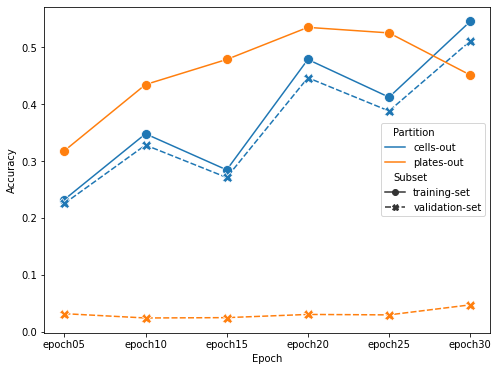

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Accuracy", hue="Partition", style="Subset", markers=True, markersize=10)

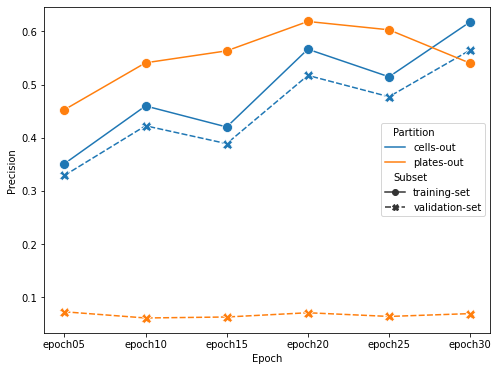

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Precision", hue="Partition", style="Subset", markers=True, markersize=10)

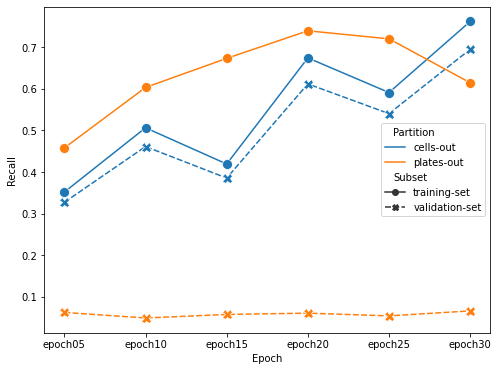

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Recall", hue="Partition", style="Subset", markers=True, markersize=10)

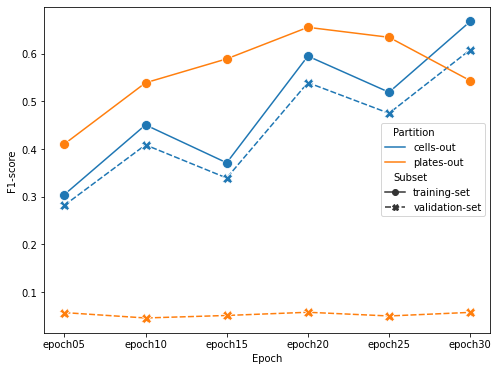

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="F1-score", hue="Partition", style="Subset", markers=True, markersize=10)

# Performance per class

In [ ]:
data = pd.read_csv(path + f"classification_{partitions[0]}_{subsets[2]}_{epochs[-1]}.csv", index_col=0)
cells_out = data.loc[data.index[0:-3]]
cells_out["Partition"] = "cells-out"
data = pd.read_csv(path + f"classification_{partitions[1]}_{subsets[2]}_{epochs[-1]}.csv", index_col=0)
plates_out = data.loc[data.index[0:-3]]
plates_out["Partition"] = "plates-out"

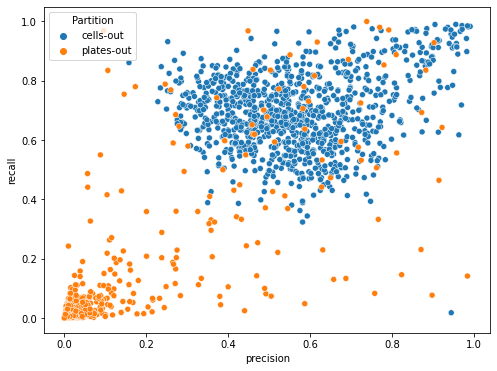

In [ ]:
view = pd.concat((cells_out, plates_out))
plt.figure(figsize=(8,6))
sb.scatterplot(data=view, x="precision", y="recall", hue="Partition")

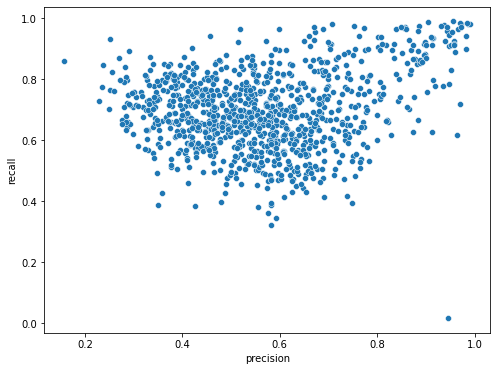

In [ ]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=cells_out, x="precision", y="recall")

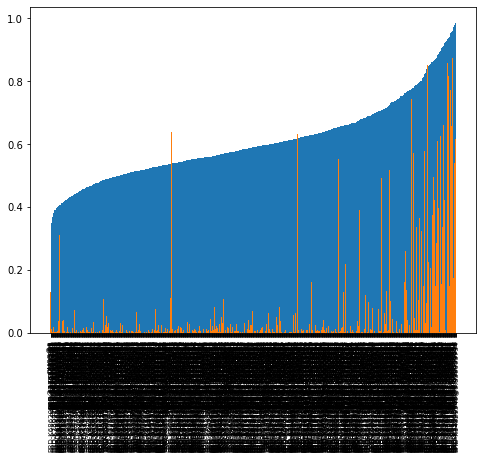

In [ ]:
idx = cells_out.sort_values(by="f1-score").index
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(idx, cells_out.loc[idx, "f1-score"], width=1.0)
plt.bar(idx, plates_out.loc[idx, "f1-score"], width=1.0)
t = plt.xticks(fontsize=7, rotation=90)

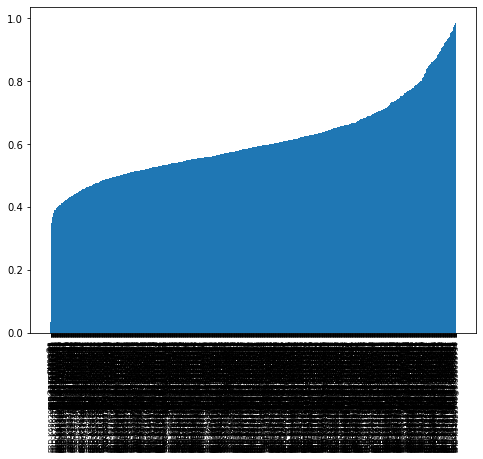

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(idx, cells_out.loc[idx, "f1-score"], width=1.0)
t = plt.xticks(fontsize=7, rotation=90)

In [ ]:
print("Bottom and Top classes")
cells_out.loc[idx]

Bottom and Top classes


,precision,recall,f1-score,support,Partition
DMSO@0,0.944637,0.017621,0.034597,464788.0,cells-out
BRD-K68620903@3.200554899,0.157803,0.861199,0.266732,951.0,cells-out
BRD-A27732521@5,0.228274,0.729465,0.347732,1534.0,cells-out
BRD-K58685305@5,0.234501,0.775862,0.360149,1682.0,cells-out
BRD-A93236127@5,0.350000,0.388889,0.368421,36.0,cells-out
...,...,...,...,...,...
BRD-K13533483@0.83152391,0.972067,0.983051,0.977528,1416.0,cells-out
BRD-K31342827@6.060846144,0.970990,0.986135,0.978504,577.0,cells-out
BRD-K12906962@6.432693646,0.986386,0.981527,0.983951,812.0,cells-out
BRD-K43245338@6.536753656,0.984480,0.985145,0.984813,1481.0,cells-out


# Classification performance vs downstream analysis

In [ ]:
cells_out = cells_out.reset_index()
cells_out["pert_name"] = cells_out["index"].str.split("@",expand=True)[0]

plates_out = plates_out.reset_index()
plates_out["pert_name"] = plates_out["index"].str.split("@",expand=True)[0]

In [ ]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/mAP_FoE/Indiv_dataset/Cells_out/conv6a/"
trt_index = pd.read_csv(f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/BBBC022_MOA_MATCHES_official.csv")
downstream = pd.read_csv(path + "efn128_cellsout_conv6a_1e-3_e30.csv", index_col=0)
downstream = pd.merge(downstream, trt_index, left_on="Var1", right_on="Var1")
downstream = pd.merge(downstream, cells_out, left_on="Var1", right_on="pert_name")

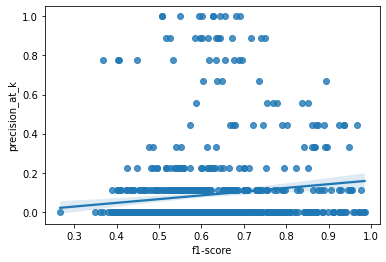

In [ ]:
sb.regplot(data=downstream, x="f1-score", y="precision_at_k")

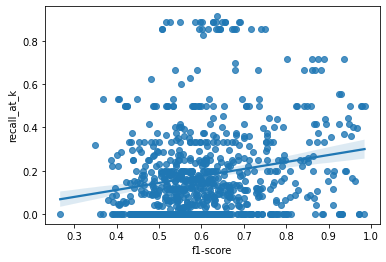

In [ ]:
sb.regplot(data=downstream, x="f1-score", y="recall_at_k")

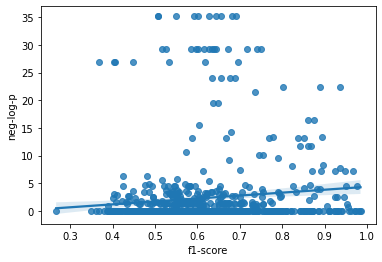

In [ ]:
downstream["neg-log-p"] = -np.log(downstream["p-value"])
sb.regplot(data=downstream, x="f1-score", y="neg-log-p")

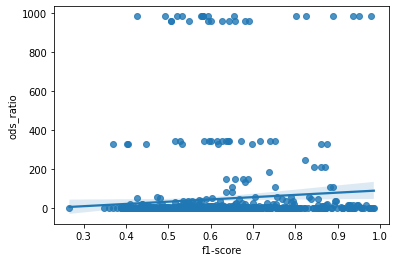

In [ ]:
sb.regplot(data=downstream, x="f1-score", y="ods_ratio")

In [ ]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental_results/{folder}/First_hit/Indiv_dataset/Cells_out/conv6a/"
'''
FH_efn128cellsout_conv6a_1e-3_e30_image_level.csv
FH_efn128cellsout_conv6a_1e-3_e30_moa.csv
FH_efn128cellsout_conv6a_1e-3_e30_treatment_level.csv
FH_efn128cellsout_conv6a_1e-3_e30_well_level.csv
'''
!ls "$path"

efn128_cellsout_conv6a_1e-1_e30_moa.csv
efn128_cellsout_conv6a_1e-1_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-2_e30_moa.csv
efn128_cellsout_conv6a_1e-2_e30_treatment_level.csv
efn128_cellsout_conv6a_1_e30_moa.csv
efn128_cellsout_conv6a_1_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-3_e30_moa.csv
efn128_cellsout_conv6a_1e-3_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-4_e30_moa.csv
efn128_cellsout_conv6a_1e-4_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-5_e30_moa.csv
efn128_cellsout_conv6a_1e-5_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-6_e30_moa.csv
efn128_cellsout_conv6a_1e-6_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-7_e30_moa.csv
efn128_cellsout_conv6a_1e-7_e30_treatment_level.csv
efn128_cellsout_conv6a_1e-8_e30_moa.csv
efn128_cellsout_conv6a_1e-8_e30_treatment_level.csv
efn128_cellsout_conv6a_no_e30_moa.csv
efn128_cellsout_conv6a_no_e30_treatment_level.csv


In [ ]:
first_hit = pd.read_csv(path + "efn128_cellsout_conv6a_1e-4_e30_image_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="Treatment", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 5))
g.invert_yaxis()

ValueError: ignored

In [ ]:
first_hit = pd.read_csv(path + "FH_efn128_cellsout_conv6a_1e-4_well_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 10))
g.invert_yaxis()

FileNotFoundError: ignored

In [ ]:
first_hit

,Compound,Treatment,first_hit,top_percent
325,BRD-K15567136,BRD-K15567136@2.66066435,1,0.100503
551,BRD-K62607865,BRD-K62607865@2.296565729,1,0.100503
548,BRD-K62310379,BRD-K62310379@1.997719206,1,0.100503
547,BRD-K62008436,BRD-K62008436@1.171088897,1,0.100503
545,BRD-K61496577,BRD-K61496577@2.436341287,1,0.100503
...,...,...,...,...
357,BRD-K22031190,BRD-K22031190@3.996840475,976,98.090452
446,BRD-K42352790,BRD-K42352790@0.5,977,98.190955
454,BRD-K44273375,BRD-K44273375@3.252991174,978,98.291457
208,BRD-A83937277,BRD-A83937277@4.58186454,985,98.994975


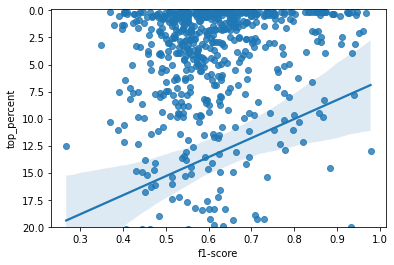

In [ ]:
first_hit = pd.read_csv(path + "FH_efn128_cellsout_conv6a_1e-4_treatment_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="Compound", right_on="pert_name")
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 20))
g.invert_yaxis()

In [ ]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/First-hit /Indiv_dataset/Plates_out/conv6a/"
'''
FH_efn128platesout_conv6a_1e-4_e30_image_level.csv
FH_efn128platesout_conv6a_1e-4_e30_moa.csv
FH_efn128platesout_conv6a_1e-4_e30_treatment_level.csv
FH_efn128platesout_conv6a_1e-4_e30_well_level.csv
'''
!ls "$path"

FH_efn128_platesout_conv6a_1e-1_moa.csv
FH_efn128_platesout_conv6a_1e-1_treatment_level.csv
FH_efn128_platesout_conv6a_1e-2_moa.csv
FH_efn128_platesout_conv6a_1e-2_treatment_level.csv
FH_efn128_platesout_conv6a_1e-3_moa.csv
FH_efn128_platesout_conv6a_1e-3_treatment_level.csv
FH_efn128_platesout_conv6a_1e-4_moa.csv
FH_efn128_platesout_conv6a_1e-4_treatment_level.csv
FH_efn128_platesout_conv6a_1e-5_moa.csv
FH_efn128_platesout_conv6a_1e-5_treatment_level.csv
FH_efn128_platesout_conv6a_1e-6_moa.csv
FH_efn128_platesout_conv6a_1e-6_treatment_level.csv
FH_efn128_platesout_conv6a_1e-7_moa.csv
FH_efn128_platesout_conv6a_1e-7_treatment_level.csv
FH_efn128_platesout_conv6a_1e-8_moa.csv
FH_efn128_platesout_conv6a_1e-8_treatment_level.csv
FH_efn128_platesout_conv6a_1_moa.csv
FH_efn128_platesout_conv6a_1_treatment_level.csv
FH_efn128_platesout_conv6a_no_moa.csv
FH_efn128_platesout_conv6a_no_treatment_level.csv


In [ ]:
first_hit = pd.read_csv(path + "FH_efn128platesout_conv6a_1e-4_e30_image_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 5))
g.invert_yaxis()

FileNotFoundError: ignored

In [ ]:
first_hit = pd.read_csv(path + "FH_efn128platesout_conv6a_1e-4_e30_well_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 10))
g.invert_yaxis()

FileNotFoundError: ignored

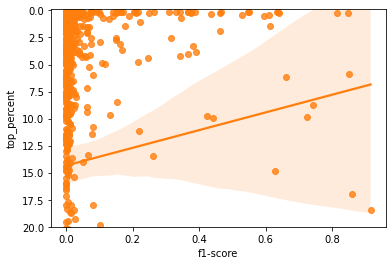

In [ ]:
first_hit = pd.read_csv(path + "FH_efn128_platesout_conv6a_1e-4_treatment_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="Compound", right_on="pert_name")
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 20))
g.invert_yaxis()